In [23]:
import pandas as pd

# Load the dataset from CSV
df = pd.read_csv('Academic_Performance.csv')
print(df.head())  # Display the first few rows

   Student_ID  Math_Score  Science_Score  English_Score  Study_Hours  \
0           1        88.0             91           85.0          6.5   
1           2        92.0             87           89.0          7.0   
2           3         NaN             88           84.0          5.5   
3           4        85.0             93           90.0          NaN   
4           5        94.0             96            NaN          8.0   

   Participation  
0              8  
1              7  
2              9  
3             10  
4              9  


In [24]:
# Check for missing values
print(df.isnull().sum())

Student_ID       0
Math_Score       1
Science_Score    0
English_Score    1
Study_Hours      1
Participation    0
dtype: int64


In [25]:
# Replace the inplace parameter with direct assignment
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].mean())
df['Science_Score'] = df['Science_Score'].fillna(df['Science_Score'].mean())
df['English_Score'] = df['English_Score'].fillna(df['English_Score'].mean())
df['Study_Hours'] = df['Study_Hours'].fillna(df['Study_Hours'].mean())
df['Participation'] = df['Participation'].fillna(df['Participation'].median())

In [26]:
df

,Student_ID,Math_Score,Science_Score,English_Score,Study_Hours,Participation
0,1,88.00,91,85.0,6.50,8
1,2,92.00,87,89.0,7.00,7
2,3,89.75,88,84.0,5.50,9
3,4,85.00,93,90.0,6.75,10
4,5,94.00,96,87.0,8.00,9


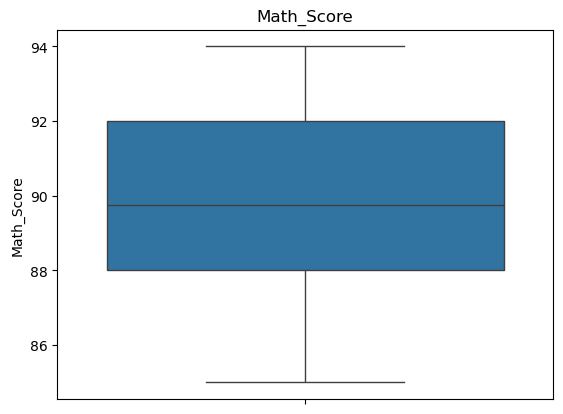

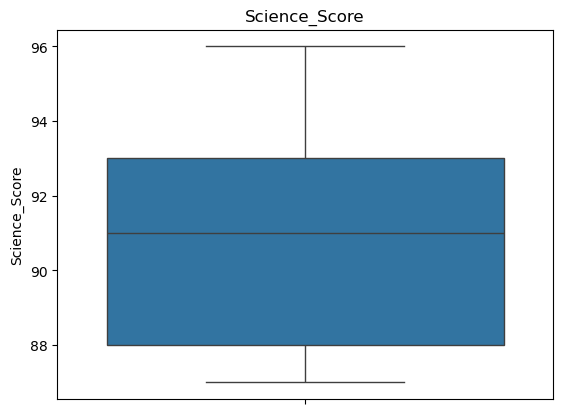

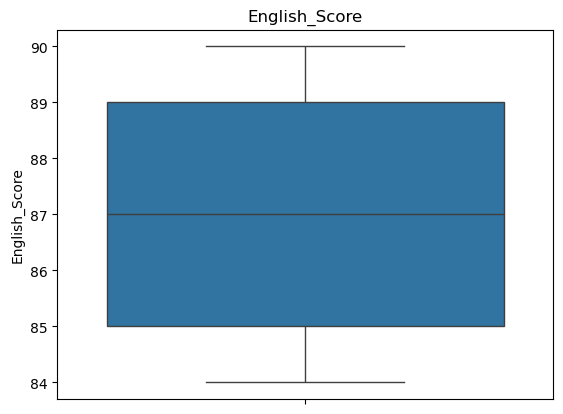

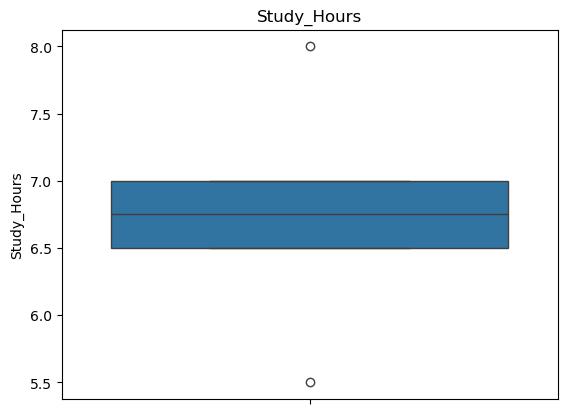

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in ['Math_Score', 'Science_Score', 'English_Score', 'Study_Hours']:
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()


In [28]:
for column in ['Math_Score', 'Science_Score', 'English_Score', 'Study_Hours']:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


In [29]:
newdf = df

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Math_Score', 'Science_Score', 'English_Score', 'Study_Hours']] = scaler.fit_transform(
    df[['Math_Score', 'Science_Score', 'English_Score', 'Study_Hours']]
)

In [31]:
df

,Student_ID,Math_Score,Science_Score,English_Score,Study_Hours,Participation
0,1,0.333333,0.444444,0.166667,0.375,8
1,2,0.777778,0.000000,0.833333,0.625,7
2,3,0.527778,0.111111,0.000000,0.000,9
3,4,0.000000,0.666667,1.000000,0.500,10
4,5,1.000000,1.000000,0.500000,1.000,9


In [42]:
newdf

,Student_ID,Math_Score,Science_Score,English_Score,Study_Hours,Participation
0,1,0.333333,0.444444,0.166667,0.375,8
1,2,0.777778,0.000000,0.833333,0.625,7
2,3,0.527778,0.111111,0.000000,0.000,9
3,4,0.000000,0.666667,1.000000,0.500,10
4,5,1.000000,1.000000,0.500000,1.000,9


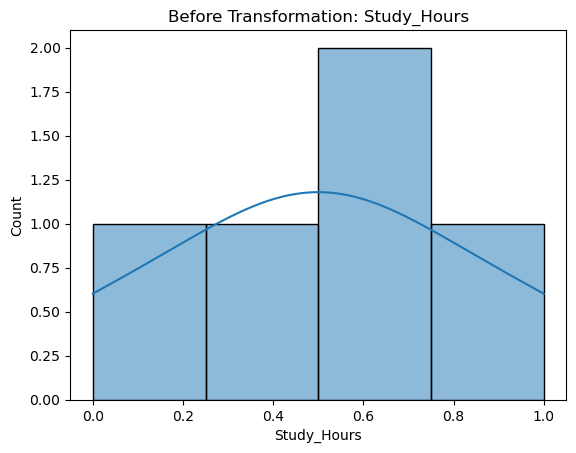

In [46]:
for column in ['Study_Hours']:
    sns.histplot(df[column], kde=True)
    plt.title(f'Before Transformation: {column}')
    plt.show()


In [48]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
df['Study_Hours_Transformed'] = transformer.fit_transform(df[['Study_Hours']])


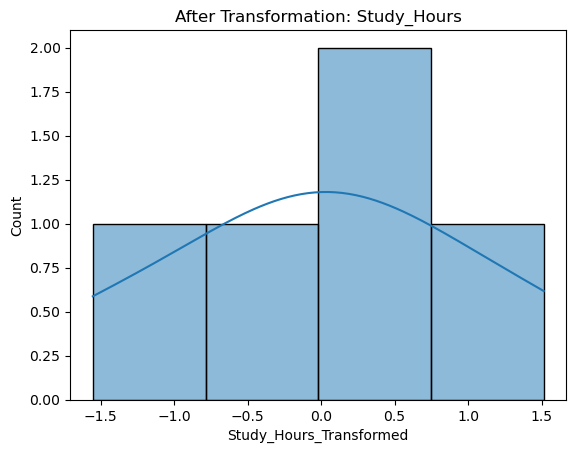

In [50]:
sns.histplot(df['Study_Hours_Transformed'], kde=True)
plt.title('After Transformation: Study_Hours')
plt.show()
